In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
path='C:/Users/Asus/OneDrive/Desktop/python project/ML projects/data.csv'
titanic_data=pd.read_csv(path)

In [3]:
titanic_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print('No. of passengers in titanic:', len(titanic_data))

No. of passengers in titanic: 891


## Analyzing Data

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

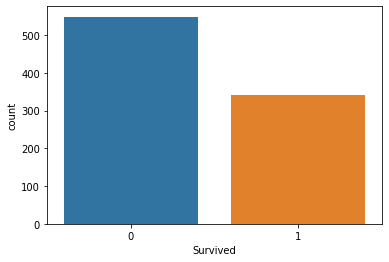

In [6]:
sns.countplot(x='Survived',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

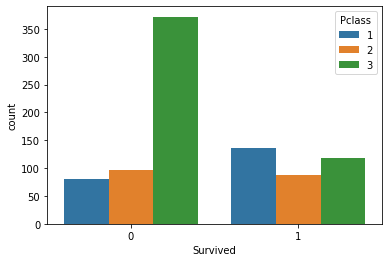

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

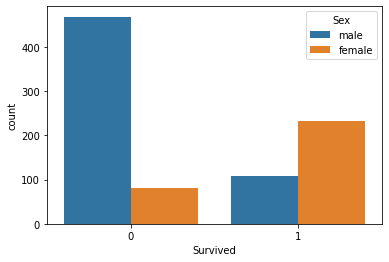

In [8]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

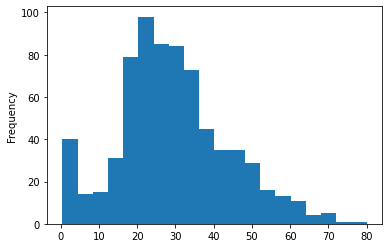

In [9]:
titanic_data['Age'].plot.hist(bins=20)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

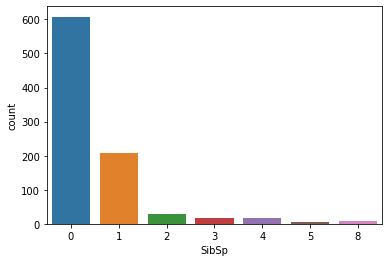

In [10]:
sns.countplot(x='SibSp',data=titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

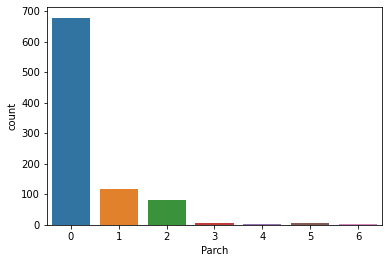

In [11]:
sns.countplot(x='Parch',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

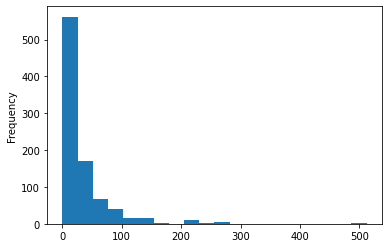

In [12]:
titanic_data['Fare'].plot.hist(bins=20)

<AxesSubplot:xlabel='Survived', ylabel='count'>

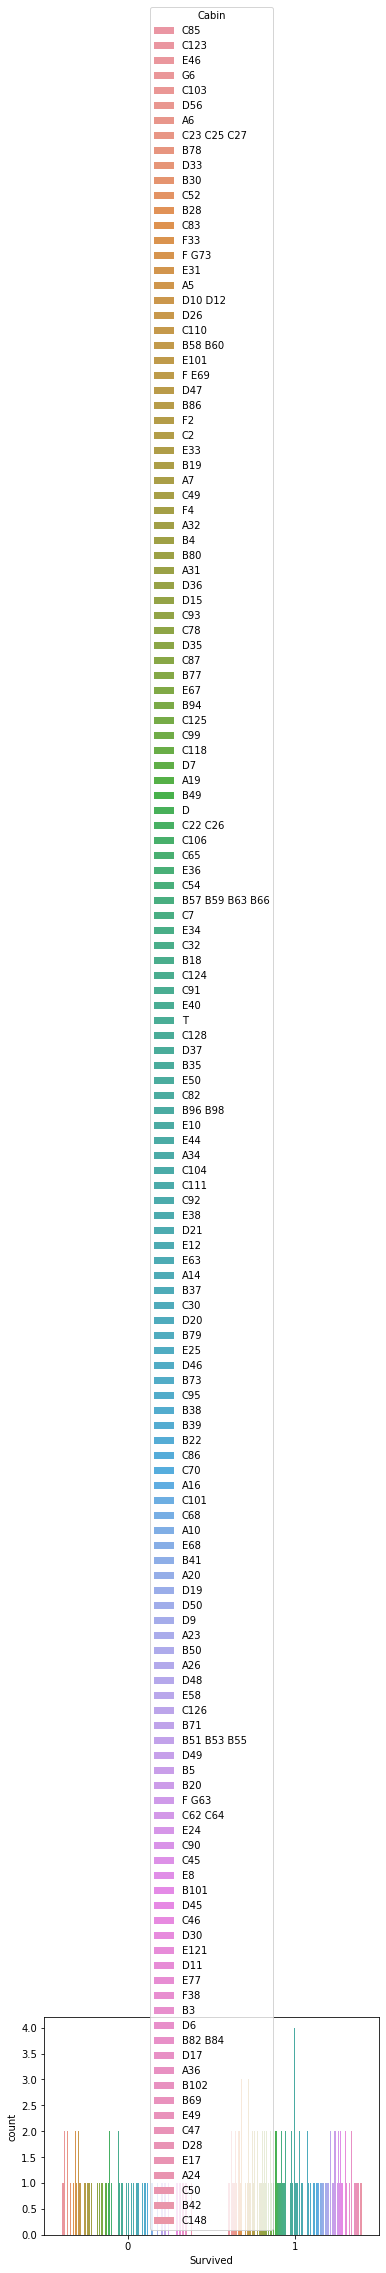

In [13]:
sns.countplot(x='Survived',hue='Cabin',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

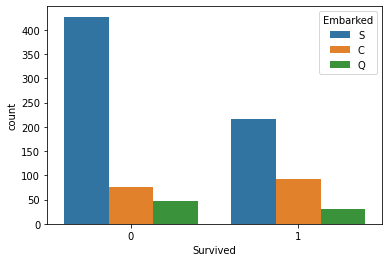

In [14]:
sns.countplot(x='Survived',hue='Embarked',data=titanic_data)

## Data Wrangling

In [15]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

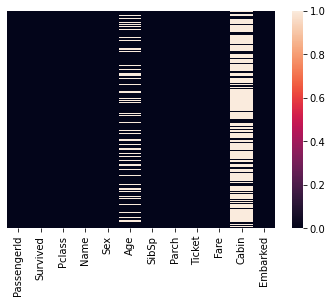

In [16]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

### Replacing Null values in Age with Mean and Embarked with Mode


In [17]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [18]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode(),inplace=True)

### Dropping the Cabin column as there are a lot of missing values

In [19]:
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:>

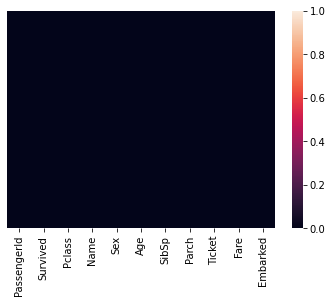

In [21]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Dropping PassengerID, Name, Ticket

In [23]:
titanic_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [24]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Creating Dummies for Sex, Pclass and Embarked

In [25]:
titanic_data=pd.get_dummies(titanic_data,columns=['Pclass','Sex','Embarked'],drop_first=True)

In [26]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


## Check For Multicollinearity

In [27]:
X=titanic_data.iloc[:,1:]

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["features"]=X.columns
vif

,VIF Factor,features
0,4.435508,Age
1,1.567252,SibSp
2,1.626185,Parch
3,1.828026,Fare
4,1.941489,Pclass_2
5,3.758953,Pclass_3
6,3.050547,Sex_male
7,1.576485,Embarked_Q
8,4.837211,Embarked_S


In [56]:
X.corr()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Age,1.000000,-0.232625,-0.179191,0.091566,0.006589,-0.281004,0.084153,-0.013855,-0.027121
SibSp,-0.232625,1.000000,0.414838,0.159651,-0.055932,0.092548,-0.114631,-0.026354,0.070941
Parch,-0.179191,0.414838,1.000000,0.216225,-0.000734,0.015790,-0.245489,-0.081228,0.063036
Fare,0.091566,0.159651,0.216225,1.000000,-0.118557,-0.413333,-0.182333,-0.117216,-0.166603
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,1.000000,-0.565210,-0.064746,-0.127301,0.192061
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,-0.565210,1.000000,0.137143,0.237449,-0.009511
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.064746,0.137143,1.000000,-0.074115,0.125722
Embarked_Q,-0.013855,-0.026354,-0.081228,-0.117216,-0.127301,0.237449,-0.074115,1.000000,-0.496624
Embarked_S,-0.027121,0.070941,0.063036,-0.166603,0.192061,-0.009511,0.125722,-0.496624,1.000000


Since VIF <10 there is no multicollinearity in the data

## Splitting data into train and test

In [29]:
 from sklearn.model_selection import train_test_split
    

In [30]:
X=titanic_data.iloc[:,1:]
y=titanic_data.iloc[:,0]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Fitting the model using Logisitic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log=LogisticRegression(max_iter=1000)

In [34]:
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred=log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_pred,y_test)

0.7761194029850746

In [38]:
from sklearn.metrics import confusion_matrix


In [39]:
confusion_matrix(y_pred,y_test)

array([[132,  39],
       [ 21,  76]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report

In [41]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.86      0.77      0.81       171\n           1       0.66      0.78      0.72        97\n\n    accuracy                           0.78       268\n   macro avg       0.76      0.78      0.77       268\nweighted avg       0.79      0.78      0.78       268\n'

## Testing the Accuracy using Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
clf=DecisionTreeClassifier()

In [44]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred1=clf.predict(X_test)

In [46]:
accuracy_score(y_pred1,y_test)

0.7425373134328358

In [47]:
confusion_matrix(y_pred1,y_test)

array([[125,  41],
       [ 28,  74]], dtype=int64)

In [48]:
classification_report(y_pred1,y_test)

'              precision    recall  f1-score   support\n\n           0       0.82      0.75      0.78       166\n           1       0.64      0.73      0.68       102\n\n    accuracy                           0.74       268\n   macro avg       0.73      0.74      0.73       268\nweighted avg       0.75      0.74      0.75       268\n'

### Testing the Accuracy using K Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier(n_neighbors=8)


In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [52]:
y_pred2=knn.predict(X_test)

In [53]:
confusion_matrix(y_pred2,y_test)

array([[138,  61],
       [ 15,  54]], dtype=int64)

In [54]:
classification_report(y_pred2,y_test)

'              precision    recall  f1-score   support\n\n           0       0.90      0.69      0.78       199\n           1       0.47      0.78      0.59        69\n\n    accuracy                           0.72       268\n   macro avg       0.69      0.74      0.69       268\nweighted avg       0.79      0.72      0.73       268\n'

In [55]:
accuracy_score(y_pred2,y_test)

0.7164179104477612